In [22]:
import pandas as pd
import numpy as np

%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples

In [23]:
GMM_first=[
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l1_3781904_1212859/model_2/GMM_first_pass_3781904_1212859_38.csv",
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l3_3781881_1212807/model_2/GMM_first_pass_3781881_1212807_105.csv"
     ]

power_first=[
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l1_3781904_1212859/power_first_pass_3781904_1212859_38.csv",
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l3_3781881_1212807/power_first_pass_3781881_1212807_105.csv"
     ]

KMeans_first=[
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l1_3781904_1212859/model_2/KMeans_first_pass_3781904_1212859_38.csv",
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l3_3781881_1212807/model_2/KMeans_first_pass_3781881_1212807_105.csv"
]

GMM_final=[
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l1_3781904_1212859/model_2/GMM_final_pass_3781904_1212859_74.csv",
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l3_3781881_1212807/model_2/GMM_final_pass_3781881_1212807_114.csv"
]

final_power=[
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l1_3781904_1212859/power_final_pass_3781904_1212859_74.csv",
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l3_3781881_1212807/power_final_pass_3781881_1212807_114.csv"
]

KMeans_final=[
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l1_3781904_1212859/model_2/KMeans_final_pass_3781904_1212859_74.csv",
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l3_3781881_1212807/model_2/KMeans_final_pass_3781881_1212807_114.csv"
]

In [24]:
df_GMMS=[pd.read_csv(x) for x in GMM_first]
df_KMeans=[pd.read_csv(x) for x in KMeans_first]
df_final_power=[pd.read_csv(x) for x in final_power]
df_first_power=[pd.read_csv(x) for x in power_first]



In [25]:
c1_power=pd.concat([df_first_power[0],df_final_power[0]])
c1_power

,Unnamed: 0,timestamp,total_power,p0,p1,p2,p3,p4,p5,p6
0,0,2022-09-29T17:20:09.127000Z,2.000000,-2.000000,-0.435761,2.000000,2.000000,2.000000,2.000000,1.535816
1,1,2022-09-29T17:20:09.255000Z,-1.438128,-2.000000,1.060624,-0.954586,-0.005897,-0.085631,-0.512606,0.289342
2,2,2022-09-29T17:20:09.383000Z,0.300078,-2.000000,2.000000,-0.547970,0.278176,-0.094996,-0.589129,1.997292
3,3,2022-09-29T17:20:09.511000Z,0.187412,-2.000000,2.000000,0.110022,-0.007713,0.203319,-0.210820,1.005201
4,4,2022-09-29T17:20:09.639000Z,-0.224019,-1.957827,1.753631,-0.488301,0.138927,0.444890,-0.533291,0.893898
...,...,...,...,...,...,...,...,...,...,...
80,80,2022-09-29T19:52:31.367000Z,-0.280872,0.300773,-0.980545,-0.350322,-0.605359,0.131767,0.682619,-0.460613
81,81,2022-09-29T19:52:31.495000Z,-0.259419,0.331758,-0.983471,-0.398551,-0.086979,-0.523264,0.353979,-0.267428
82,82,2022-09-29T19:52:31.623000Z,-0.553924,0.358647,-0.929622,0.193154,0.002633,-0.733120,-0.269723,-0.657691
83,83,2022-09-29T19:52:31.751000Z,-0.232032,0.158791,-0.980533,1.338688,1.822852,-0.755551,-0.549340,-0.842735


In [26]:
c3_power=pd.concat([df_first_power[1],df_final_power[1]])
c3_power

,Unnamed: 0,timestamp,total_power,p0,p1,p2,p3,p4,p5,p6
0,0,2022-09-29T20:34:38.127000Z,1.785659,-2.000000,-0.619757,1.044362,2.000000,2.000000,-0.054352,1.620678
1,1,2022-09-29T20:34:38.255000Z,-1.621324,-2.000000,0.603279,-1.248198,0.241533,0.587390,-0.799880,0.147531
2,2,2022-09-29T20:34:38.383000Z,0.282088,-2.000000,-0.536928,-1.271570,-0.582165,-0.341201,1.263741,2.000000
3,3,2022-09-29T20:34:38.511000Z,-1.714359,-2.000000,0.498150,-0.473641,-0.459869,-0.713032,-0.556295,-0.635157
4,4,2022-09-29T20:34:38.639000Z,-0.557162,-0.914715,-0.611946,1.230285,-0.487724,0.089342,1.365403,-1.119214
...,...,...,...,...,...,...,...,...,...,...
88,88,2022-09-29T20:42:14.391000Z,1.567895,1.857909,1.315904,-1.063425,2.000000,1.051309,2.000000,-0.879893
89,89,2022-09-29T20:42:14.519000Z,0.966074,1.677732,0.328812,-1.045620,0.349267,2.000000,-0.462412,0.226064
90,90,2022-09-29T20:42:14.647000Z,1.048616,1.701607,-0.252966,-0.748278,0.292841,-0.102542,1.790785,-0.193016
91,91,2022-09-29T20:42:14.775000Z,0.045543,1.834799,0.727739,-1.329656,-0.528545,0.928058,-0.619133,-0.675755


In [27]:
t_sne = TSNE(n_components=3)

/home/spoudel/anaconda3/envs/rica/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/spoudel/anaconda3/envs/rica/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


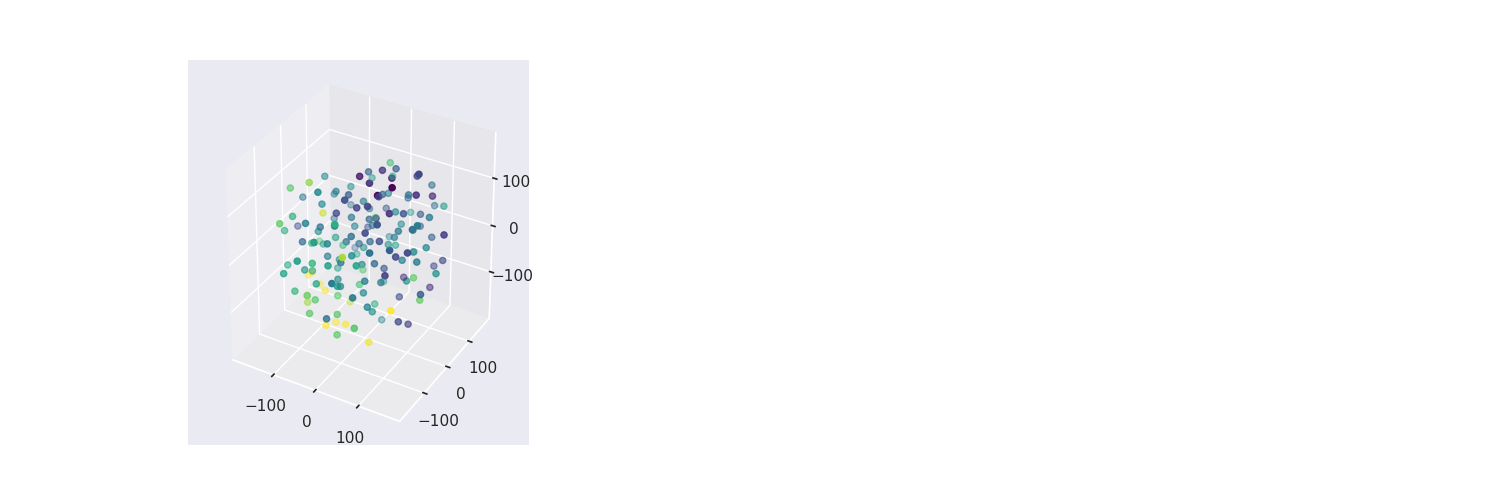

In [30]:
# Raw Power Points xForm
powerPoints = t_sne.fit_transform(c1_power.iloc[:, 2:].values)
[powerX, powerY, powerZ] = powerPoints.T
sns.set(style='darkgrid')
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(powerX, powerY, powerZ, c=c1_power['total_power'], cmap='viridis')


/home/spoudel/anaconda3/envs/rica/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/spoudel/anaconda3/envs/rica/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


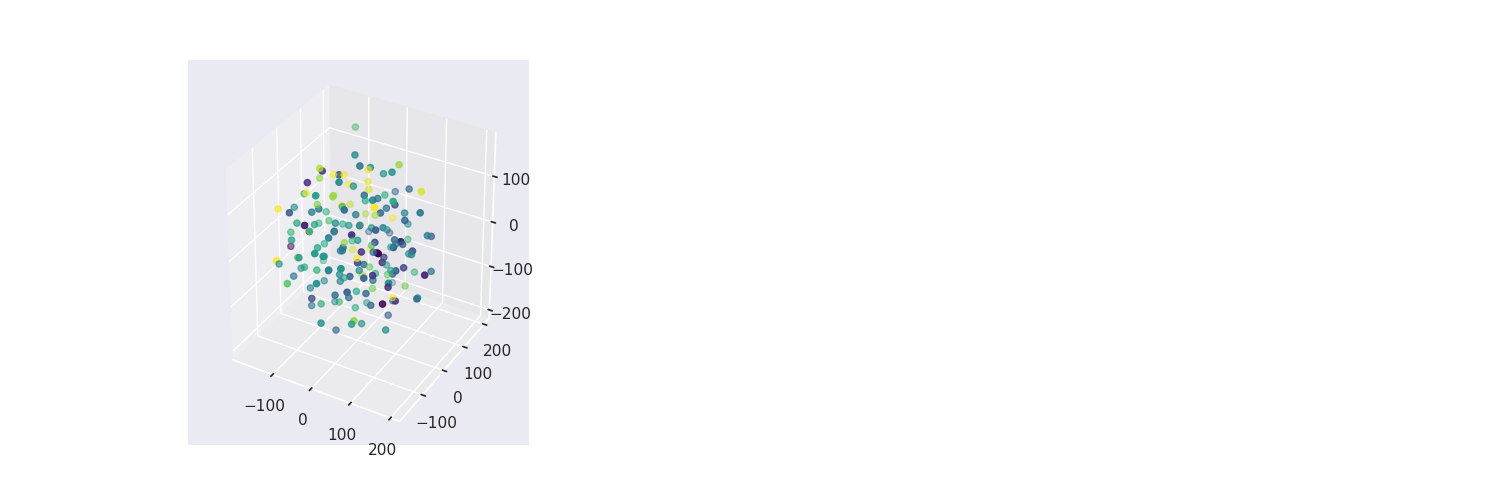

In [32]:
powerPoints = t_sne.fit_transform(c3_power.iloc[:, 2:].values)
[powerX, powerY, powerZ] = powerPoints.T
sns.set(style='darkgrid')
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(powerX, powerY, powerZ, c=c3_power['total_power'], cmap='viridis')